# Module 09: *k*-Nearest Neighbors

**Student Name**: Bella Chin

**Date**: 10/29/2024

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import math
import numpy as np

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [6]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label

In [54]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

# inspect the distribution & pairwise relationships between the features
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


The iris dataset contains 150 entries with four numerical featuries: sepal length, sepal width, petal length, and petal width. It also contains a categorial target column called class, which represetns the type of iris. All the columns contain no missing values. We can see that in the "setosa" class of the iris dataset, the petal width and petal length are consistently small, with values around 1.4 to 1.7 for petal length and 0.1 to 0.4 for petal width, showing low variability. Sepal length and sepal width have mrore variation, having around 2.2 to 5.1 for sepal length and 2.9 to 3.9, but there doesn't seem to be any strong linear relationship between them. The speal measurements are generally larger than the petal measurements, which may help differentiate this species from others.

### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [30]:
# print summary statistics
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


The summary shows that all four features (sepal length, sepal width, petal length, petal width) have 150 entries, with no missing values. Average sepal measurements are around 5.84 for sepal length and 3.06 for sepal width , while petal measurements are 3.76 for petal length and 1.20 petal width. Petal length shows the most variability (standard deviation of 1.77), while sepal width is the most consistent (0.44). The range is widest for petal length (5.9) and narrowest for sepal width (2.4), suggesting greater diversity in petal lengths. Quartile values reveal that petal measurements are generally more varied, which may help distinguish different iris species in the dataset.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

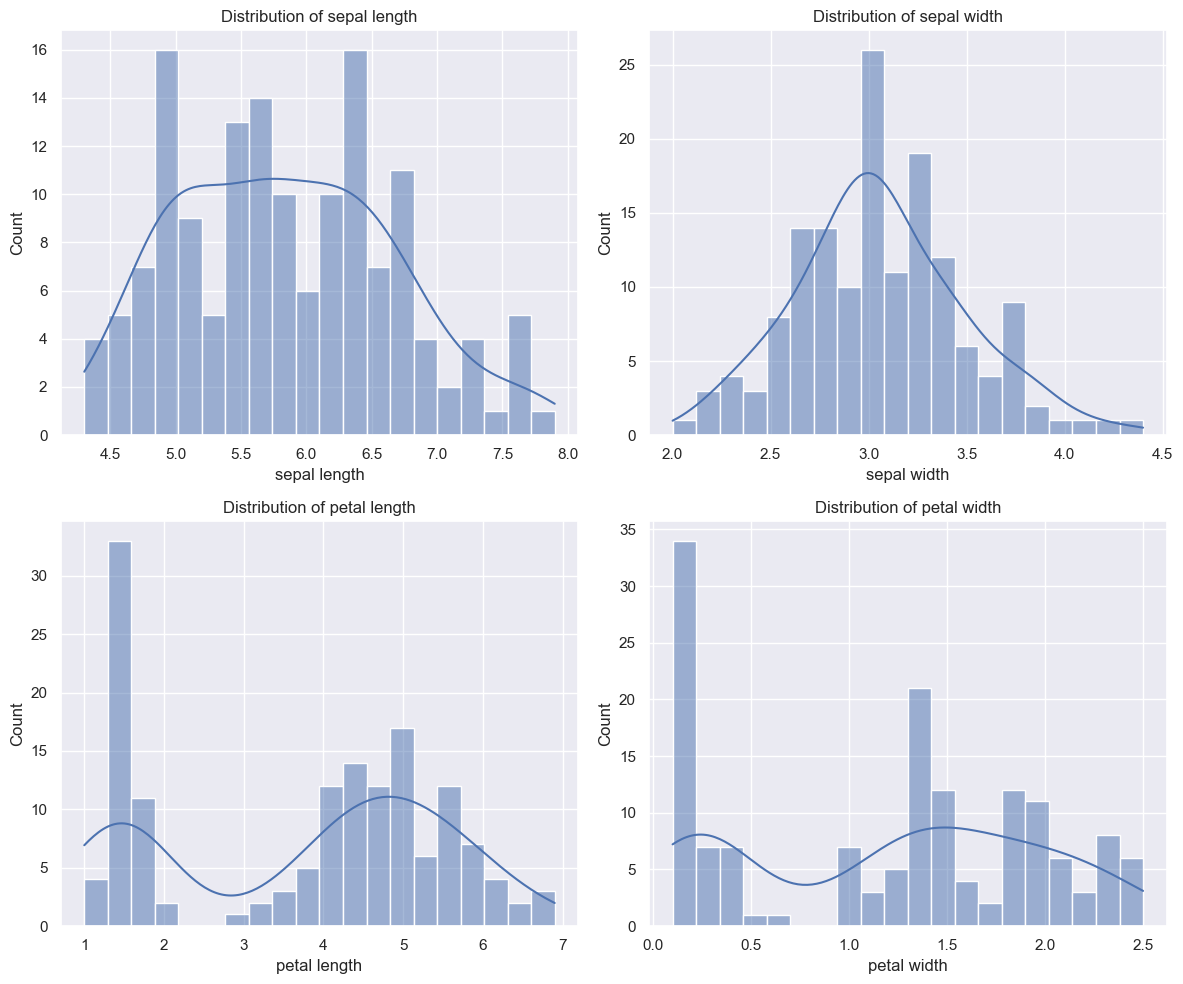

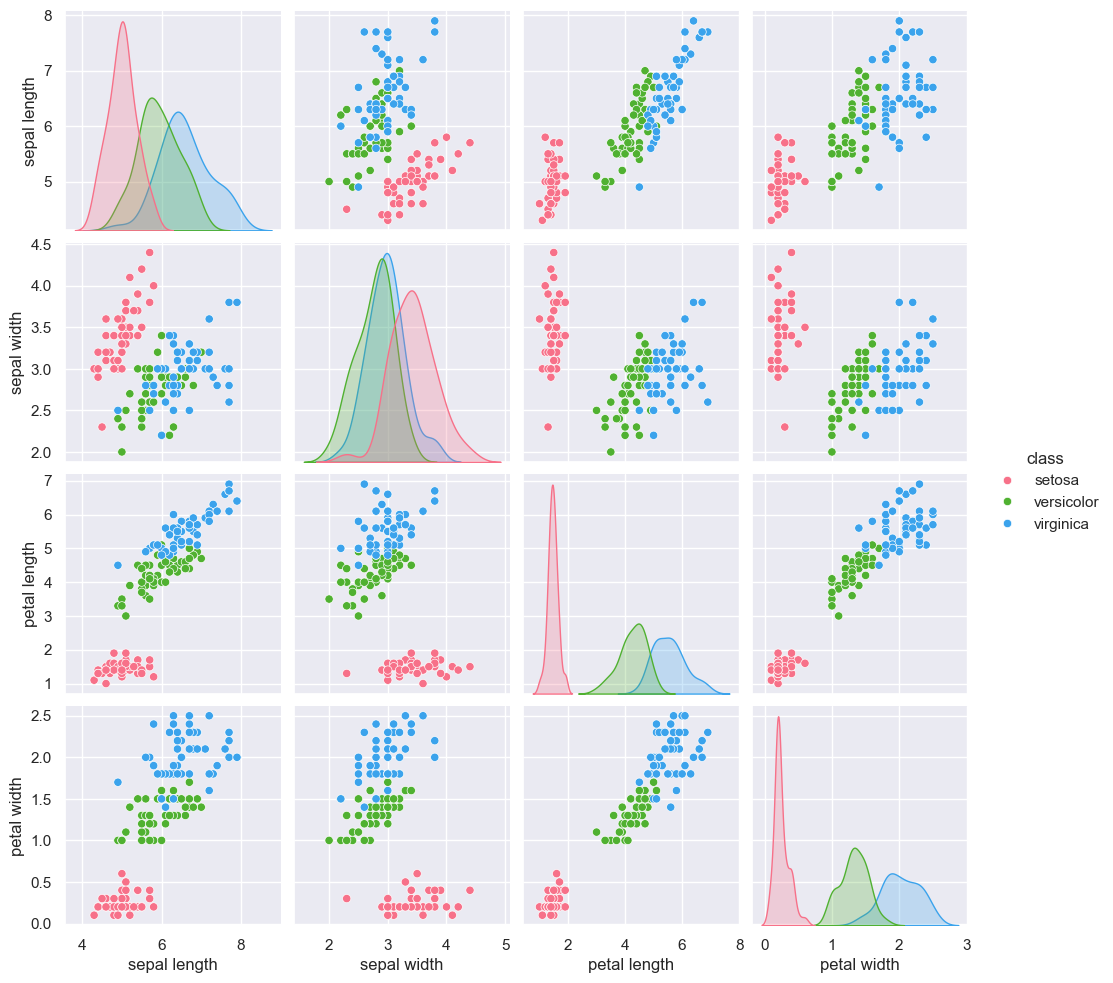

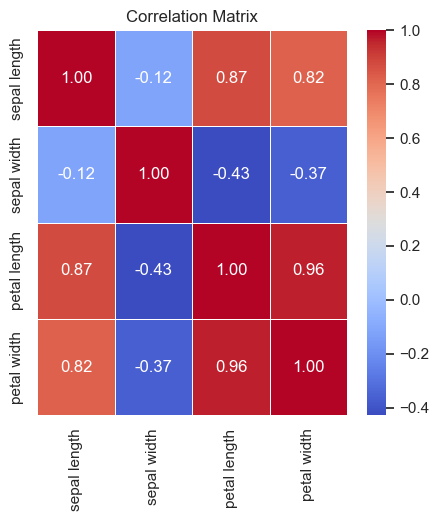

In [74]:
# visualize the distribution
plt.figure(figsize=(12, 10))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# visualize the pairwise relationships btwn the features (tutorialspoint - visualizing pairwise relationship)
sns.pairplot(df, hue = 'class', diag_kind = 'kde', kind = 'scatter', palette = 'husl')
plt.show()

# visualize the correlation matrix, excluding the 'class' column (correlation matrix geeksforgeeks)
plt.figure(figsize=(5, 5))
numeric_df = df.select_dtypes(include=[float, int])  #pandas doc for select dtypes
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #seaborn documentation
plt.title('Correlation Matrix')
plt.show()


The first set of histograms shows that each feature in the iris dataset has a unique distribution. Sepal length is roughly normal, centered around 5.5 to 6 , with a slight right skew. Sepal width follows a more normal distribution centered near 3. Petal length and petal width display distributions with peaks at smaller values (around 1 to 2) and a spread of values at higher ranges, suggesting some classes of iris flowers have distinctly different petal sizes. Petal length spans from 1 to 7, while petal width is mostly concentrated below 1.5.

The pair plot reveals relationships between features and highlights class separations. There is a strong positive correlation between petal length and petal width, as they form clear clusters for each iris species. Setosa is distinguishable with smaller petals and is separated from versicolor and virginica in these dimensions. Sepal length and sepal width have a weaker correlation, with some overlap between classes, making them less effective for distinguishing species. Overall, petal measurements are more indicative of class differences, especially between versicolor and virginica, which have overlapping ranges for sepal measurements but distinct petal ranges.

The correlation matrix reveals strong positive relationships between sepal length and petal length (0.87), sepal length and petal width (0.82), and especially petal length and petal width (0.96), indicating that these features tend to increase together. In contrast, sepal width has moderate negative correlations with both petal length (-0.43) and petal width (-0.37), suggesting an inverse relationship. The weakest correlation is between sepal length and sepal width (-0.12), showing little association between these two features.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

K: 2, Accuracy: 0.96
K: 3, Accuracy: 0.96
K: 4, Accuracy: 0.96
K: 5, Accuracy: 0.96
K: 6, Accuracy: 0.96
K: 7, Accuracy: 0.96
K: 8, Accuracy: 0.93
K: 9, Accuracy: 0.96
K: 10, Accuracy: 0.91
K: 11, Accuracy: 0.96
K: 12, Accuracy: 0.96
K: 13, Accuracy: 0.96
K: 14, Accuracy: 0.96
K: 15, Accuracy: 0.96
K: 16, Accuracy: 0.91
K: 17, Accuracy: 0.91
K: 18, Accuracy: 0.91
K: 19, Accuracy: 0.91
K: 20, Accuracy: 0.89
K: 21, Accuracy: 0.93


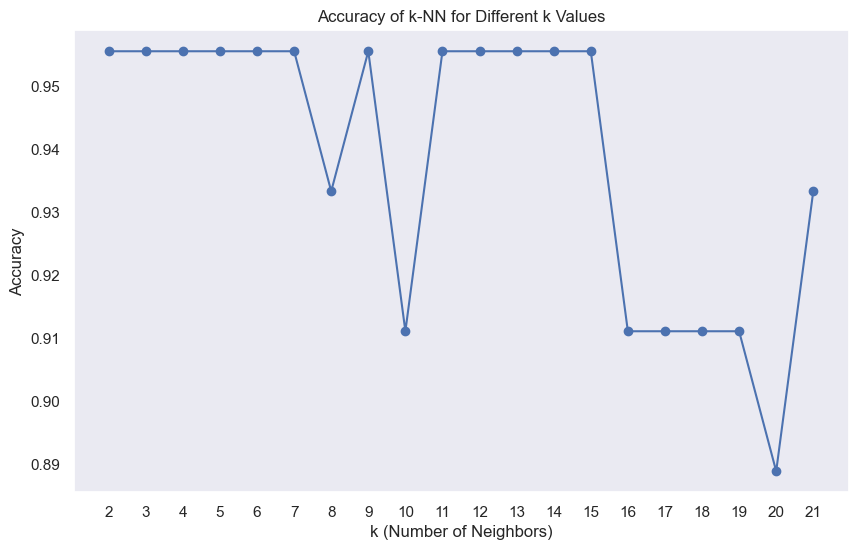

[0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.9333333333333333]


In [117]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y
                                        #TODO: enter the appropriate values to partition the data, 
                                        #and ensure your results are reproducible
                                        #and obtain stratified samples 
                                        ) 

#build the k-nn model, experiment with different values of k and plot the results

# get the optimal value of k using square root method
opt_k = int(math.sqrt(len(X)))
k_values = range(opt_k - 10, opt_k + 10)
accuracies = []
predictions = []

# test each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    predictions.append(y_pred)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"K: {k}, Accuracy: {accuracy:.2f}")
# plot the accuracy for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy of k-NN for Different k Values")
plt.xticks(k_values)
plt.grid()
plt.show()

# Determine the best value of k

# look at the numerical accuracies of the different k-values
print(accuracies)

Based on the graph above of the accuracy of different k-values, there are multiple k-values that hold the same accuracy. K-values 2-7,9, and 11-15 hold the same accuracy of 0.96. Since they all hold the same accuracy, we have to evaluate which k-value would the most optimal. We don't want to select lower values of k due to is susceptibility to noise. Selecting a k-value of 9 would be the best value of k. Since they are not the lowest or highest k-value, we can expect optimal performance from them.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [115]:
# initialize classifier and set number of neighbors to 9 since 9 was our chosen k
knn = KNeighborsClassifier(n_neighbors=9) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Display the classification report
print("Classification Report for k = 9:")
print(classification_report(y_test, y_pred))

Classification Report for k = 9:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



The classification report for the k-NN model with k = 9 shows excellent performance, with an overall accuracy of 96%. Class 0 achieved perfect precision and recall (1.00), while classes 1 and 2 demonstrated high precision (93%) and recall (93%). The F1-scores of 1.00 for class 0 and 0.93 for the others indicate strong performance across all classes. The balanced support of 15 instances per class ensures reliable metrics, and both macro and weighted averages of 0.96 confirm uniform effectiveness. Overall, these results reflect a capable model for the given classification task.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

1. Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. It is only accurate if the model is balanced, if not, it will give inaccurate results. It is useful when the classes are balanced and when true positives and true negatives are similar. An example where we would choose accuracy over the others is in cases such as disease detection model. If 90 out of 100 patietns are health and 10 have a disease, if the model correctly identifies 80 healthy patients and 5 sick ones, the accuracy would be 85%. Accuracy is useful if we were trying to determine the overall effectiveness of the model
2. Precision is the ratio of true positive predictions to the total predicted positives. It measures the how many of the predicted positive cases were actually postitive. It is useful in the cases where false positives are more costly than false negatives. An example where we would choose precision is in cases such as a spam detection model. If a system marks 10 emails as spam when only 3 are actually spam, the precision would be 30%. This is critical in this case because false positives such as incorrectly marking emails can lead to lost communication of important emails.
3. Recall is the ratio of true positive predictions to the total actual positives. It measures how many actual positive cases were correctly identified. Recall is useful when false negatives are more detrimental than false positives. An example where we would choose recall is in cases such as a cancer detection scenario. If the model correctly identifies 40 out of 100 patients, the recall would be 40%. Recall is useful here because failing to identify a cancer patient can have severe health consequences for the patient.

Another approach that can be used to partition the dataset is cross validation. It is a resampling procedure used to evaluate machine learning models on a limited data sample. It works by randomly shuffling the dataset and dividing it into k equal parts rather than the training and testing set like for the train-test split. For each fold, the model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold serving as the test set once. The final performance metric is calculated by averaging the results from all folds, providing a more reliable estimate of the model's performance and reducing variability associated with a single train-test split. This approach helps improve the model's ability to generalize to unseen data.

## Resources / References
Share any resources that were helpful in your response for question 4. 

machinelearningmastery.com/k-fold-cross-validation/
https://medium.com/@kennymiyasato/classification-report-precision-recall-f1-score-accuracy-16a245a437a5